# 00 Machine Learning: Training vs Testing Sets

**Sklearn modeling flow**
- Import the model: `from sklearn import model`
- Instantiate the model: `model = model()`
- Train the model: `model.fit(X, y)`
- Evaluate the model: `model.score(new_X, new_y)`
- Predict outcomes with new data: `model.predict(new_X)`

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

### 01 Reading the <font color="green">Data</color>

In [38]:
# Read in housing data
data = pd.read_csv('data/csv/data_ml_houses.csv')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Pesos', 'WallMat', 'RoofSurface',
       'ChimneyStyle', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [39]:
filtered = data[['GrLivArea','SalePrice']]
filtered.head(3)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

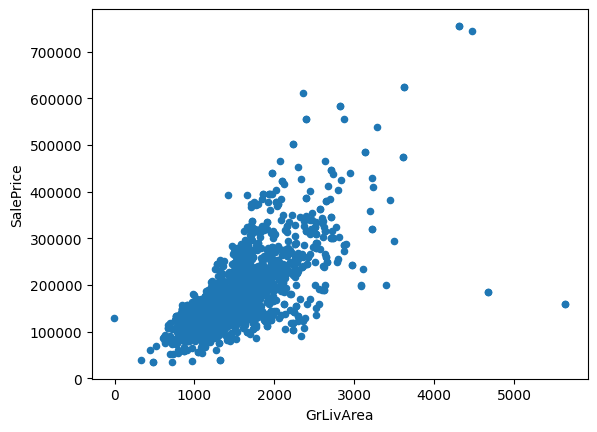

In [40]:
# visualise to check correlation
filtered.plot(x='GrLivArea',y='SalePrice',kind='scatter')

### 02 Splitting the data into training & Test sets

In [41]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(filtered, test_size=0.3)

# ready x's and y's
x_train = train_data[['GrLivArea']]
y_train = train_data[['SalePrice']]

x_test = test_data[['GrLivArea']]
y_test = test_data[['SalePrice']]


OR

In [42]:
# Ready x and y
x = filtered[['GrLivArea']]
y = filtered['SalePrice']

# Split into Train/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 03 Training and Scoring

Different random splits will create different results

In [49]:
# Instantiate the model 
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Score the model on the Test Data
model.score(x_test,y_test)

0.54367281333

### 04 Cross Validate to get the mean of the randomly seleted sets 

In [44]:
from sklearn.model_selection import cross_validate

# Instantiate model 
model = LinearRegression()

# 5 fold cross validate model 
cv_results = cross_validate(model, x, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()


0.4863112208425962

In [50]:
# create new data input 
new_data = pd.DataFrame({'GrLivArea': [1000]})
new_data

,GrLivArea
0,1000


In [51]:
# Use model to predict cost of building with area of 1000 ft2
result = model.predict(new_data)
result

array([129564.73490212])

### 05 Visualise the prediction

- **Bias (Underfitting)**: The inability for an algorithm to learn the patterns within a dataset
- **Variance (Overfitting)**: The algorithm generates an overly complex relationship when modeling patterns within a dataset.

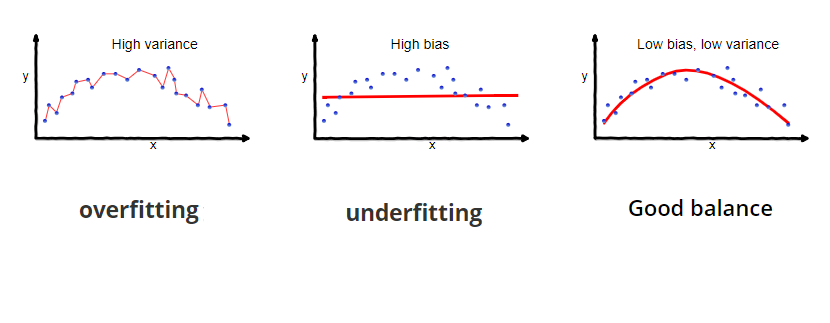

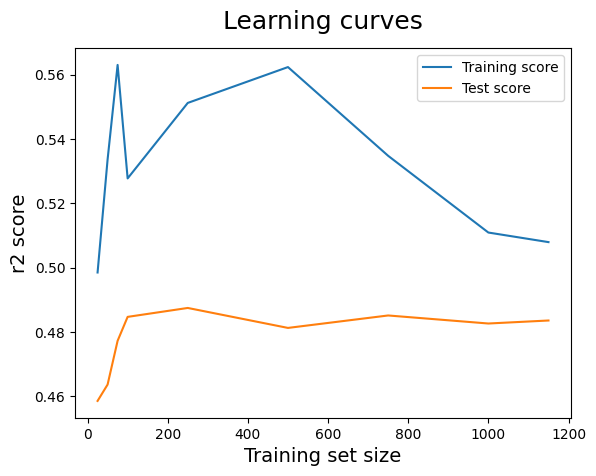

In [53]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()